In [50]:
#import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy.random import seed
from sklearn.preprocessing import StandardScaler



In [51]:
# Set the random seed for reproducibility of results
seed(42)

In [52]:
# Load the dataset from an Excel file into a DataFrame
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [53]:
len(df)

10683

In [54]:
df.shape

(10683, 11)

In [55]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## **Handling Null Values**

In [56]:
#Check for missing values in each column of the DataFrame and count the number of occurrences
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [57]:
# Identify rows with missing values
# We find that only one row contains null values, so removing this row will have no impact on the model.
df[df['Route'].isna() | df['Total_Stops'].isna()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [58]:
df=df.dropna()
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


## **Handling Duplicates**

In [59]:
df.duplicated().sum() #check for duplicates

220

In [60]:
df=df.drop_duplicates(keep='first') #Remove the duplicates except for their first occurence
df.duplicated().sum()

0

In [61]:
df.shape

(10462, 11)

In [62]:
df.shape

(10462, 11)

## **Data PreProcessing and EDA**

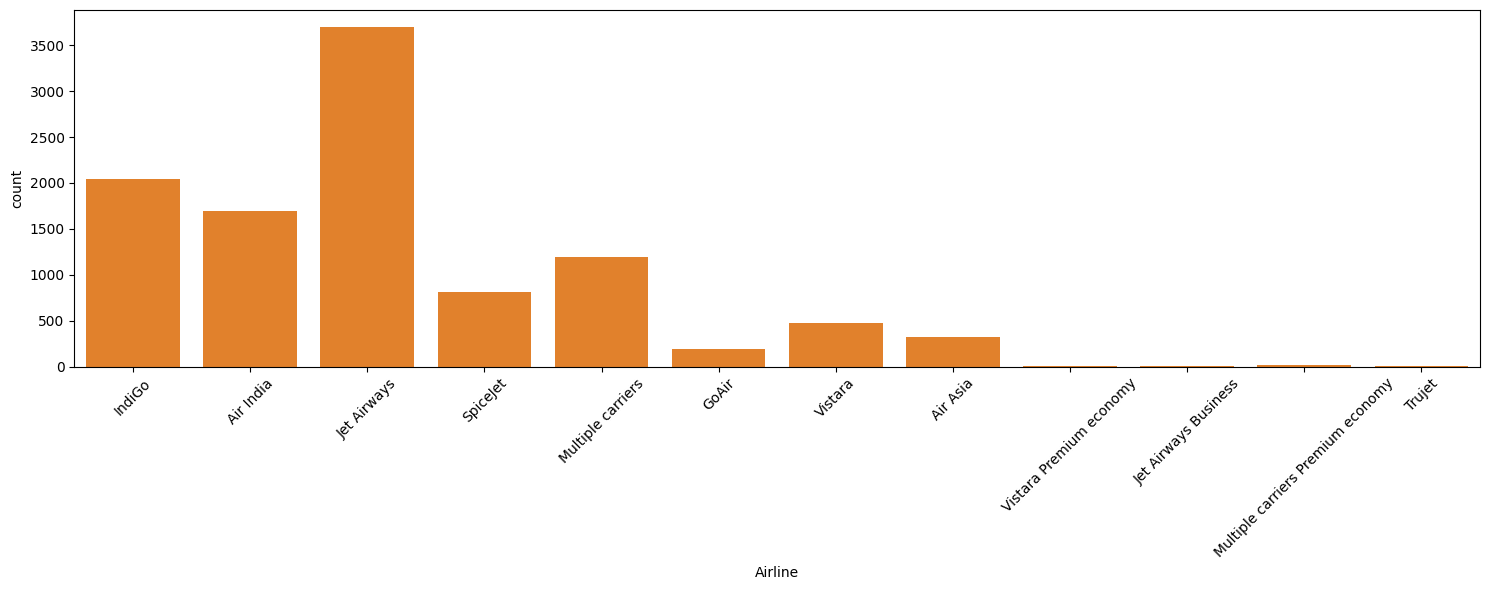

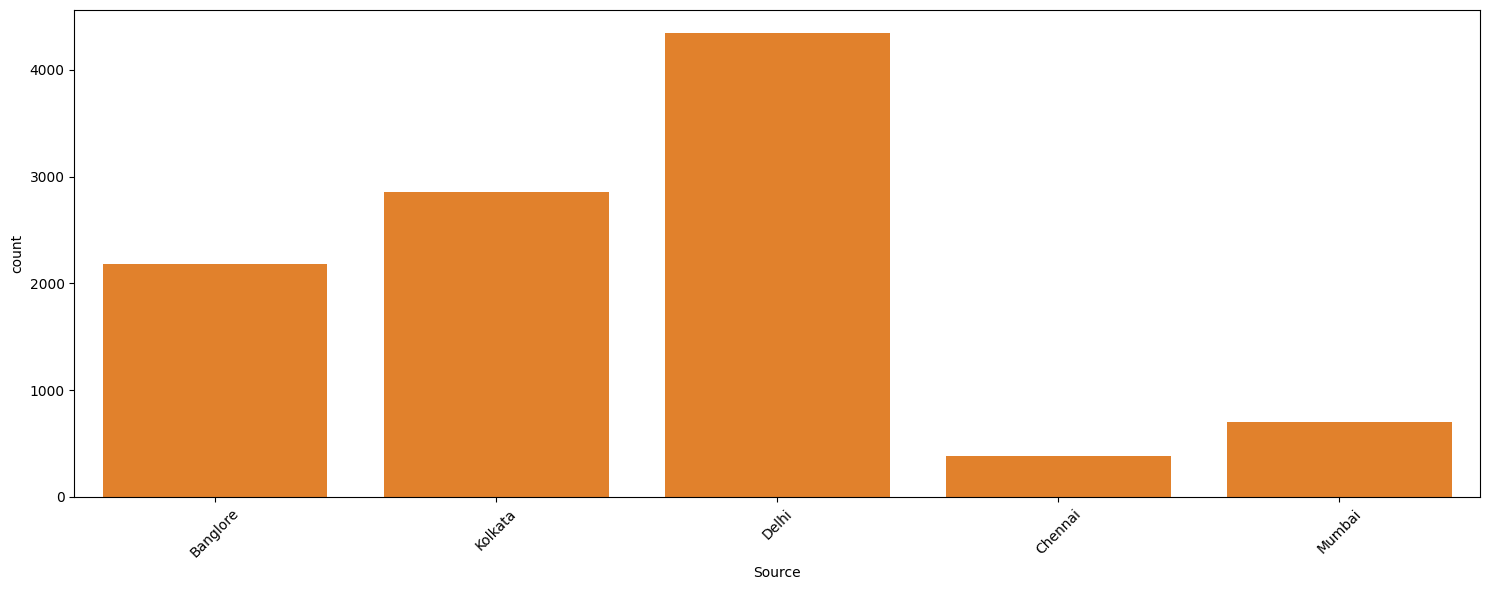

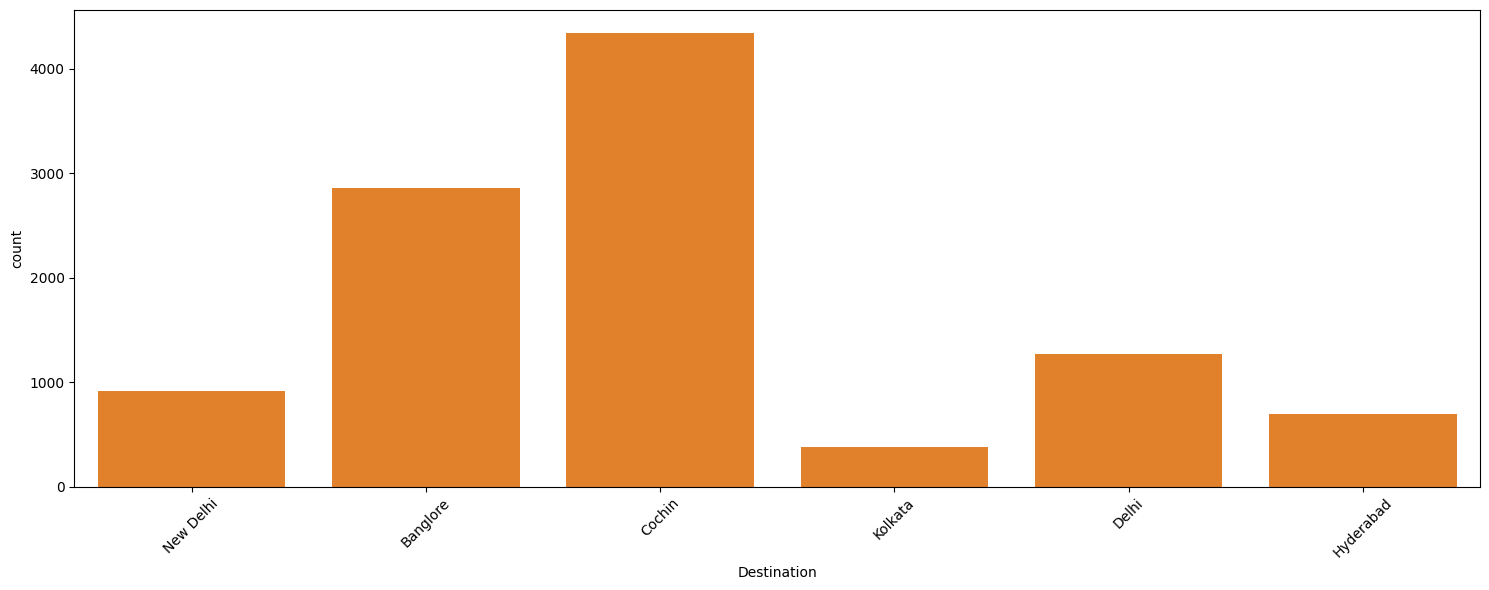

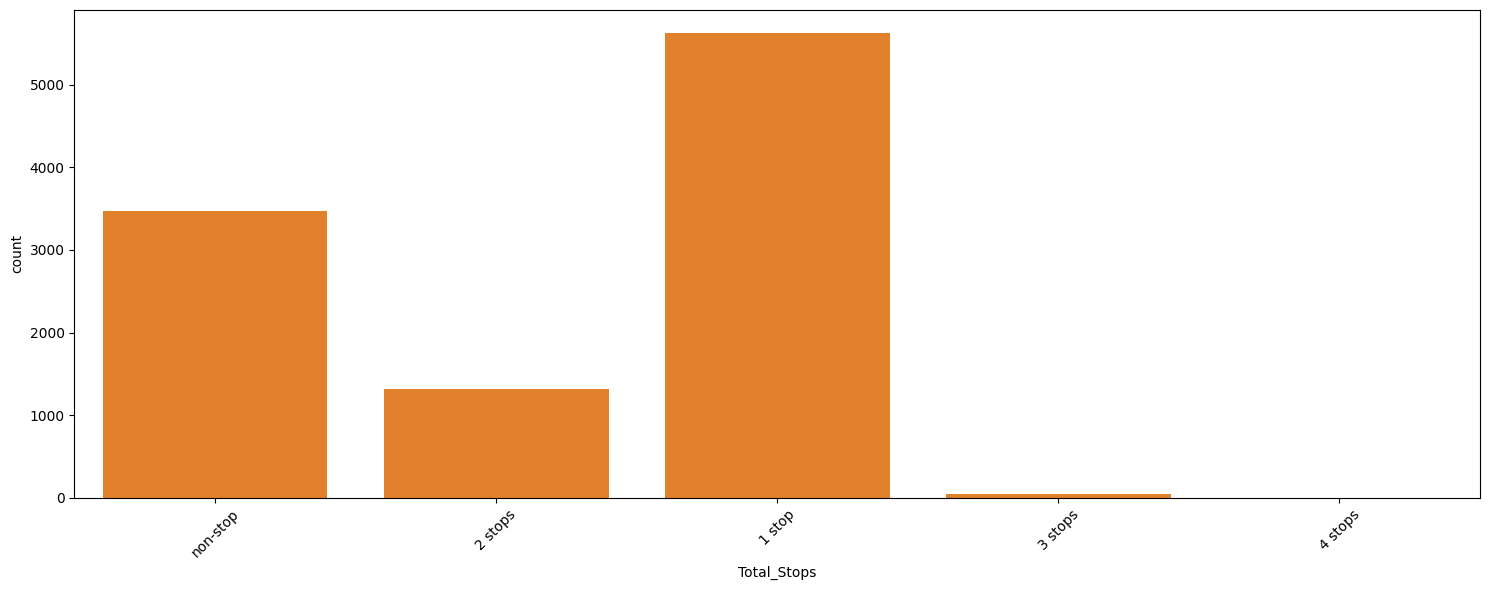

In [63]:
# Loop through the specified categorical columns to visualize the distribution and frequency of each category
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    # Create a figure with a specific size
    plt.figure(figsize=(15, 6))

    # Create a count plot for the current column 'i'
    sns.countplot(data=df, x=i)

    # Sort the values by 'Price' and create a count plot again for better visualization
    ax = sns.countplot(x=i, data=df.sort_values('Price', ascending=True))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent overlap of plot elements
    plt.tight_layout()

    # Display the plot
    plt.show()


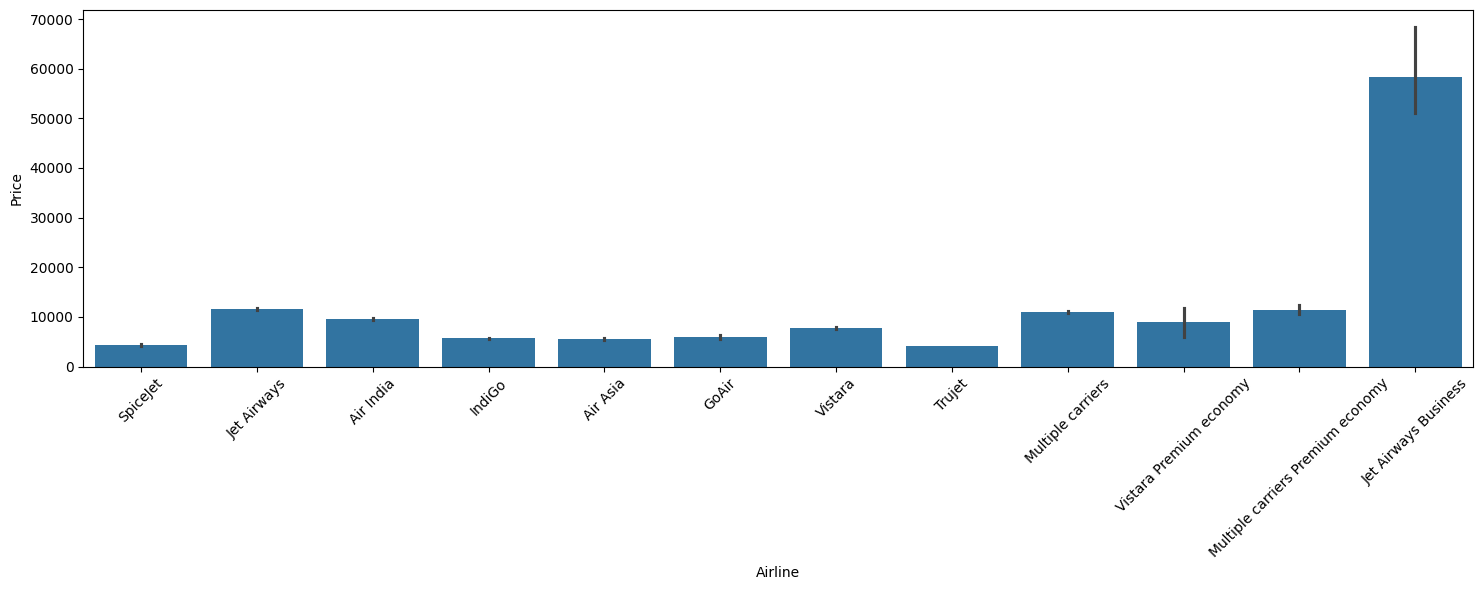

In [64]:
# Create a bar plot to visualize the average 'Price' for each 'Airline', sorted by price
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap of plot elements
plt.tight_layout()

# Display the plot
plt.show()


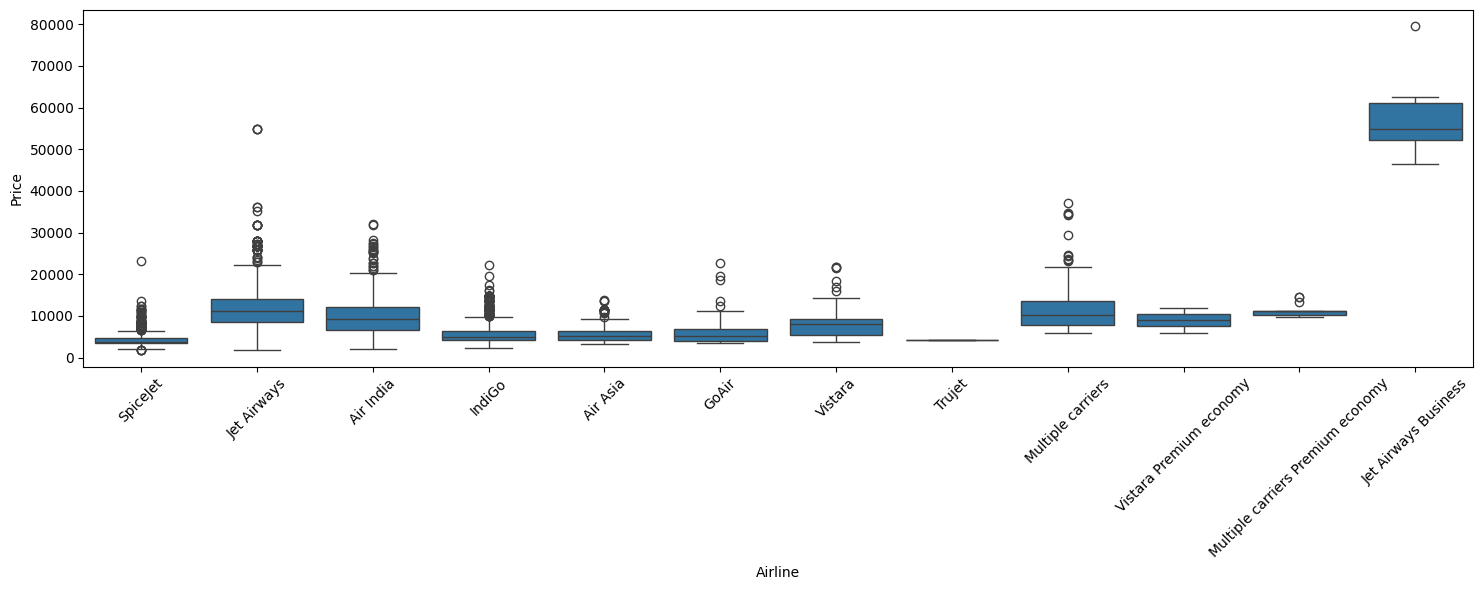

In [65]:
# Create a box plot to visualize the distribution of 'Price' for each 'Airline', highlighting price variations and outliers
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap of plot elements
plt.tight_layout()

# Display the plot
plt.show()


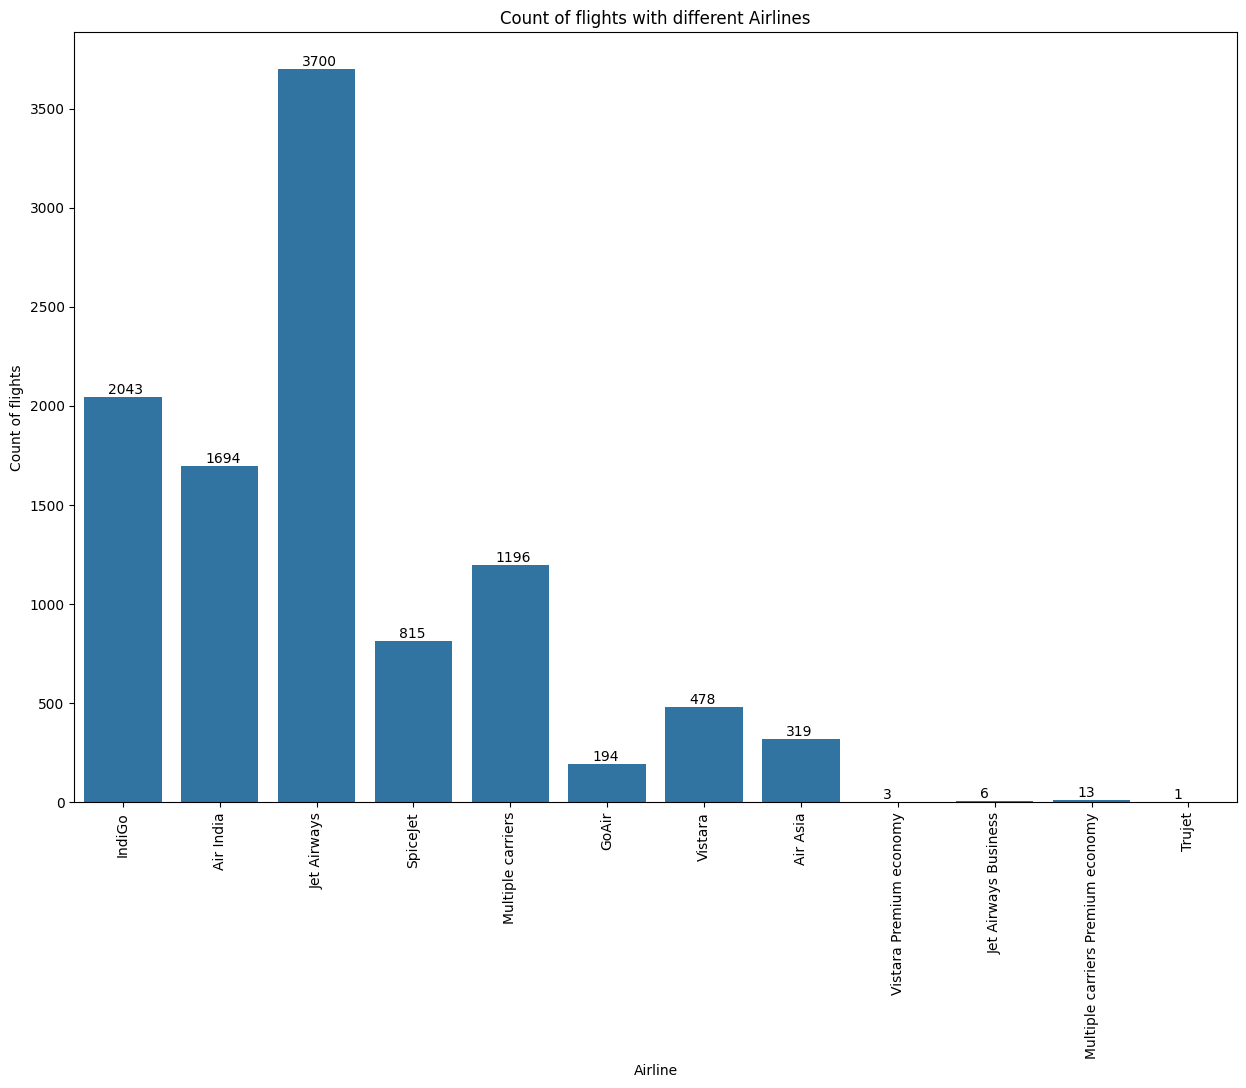

In [66]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

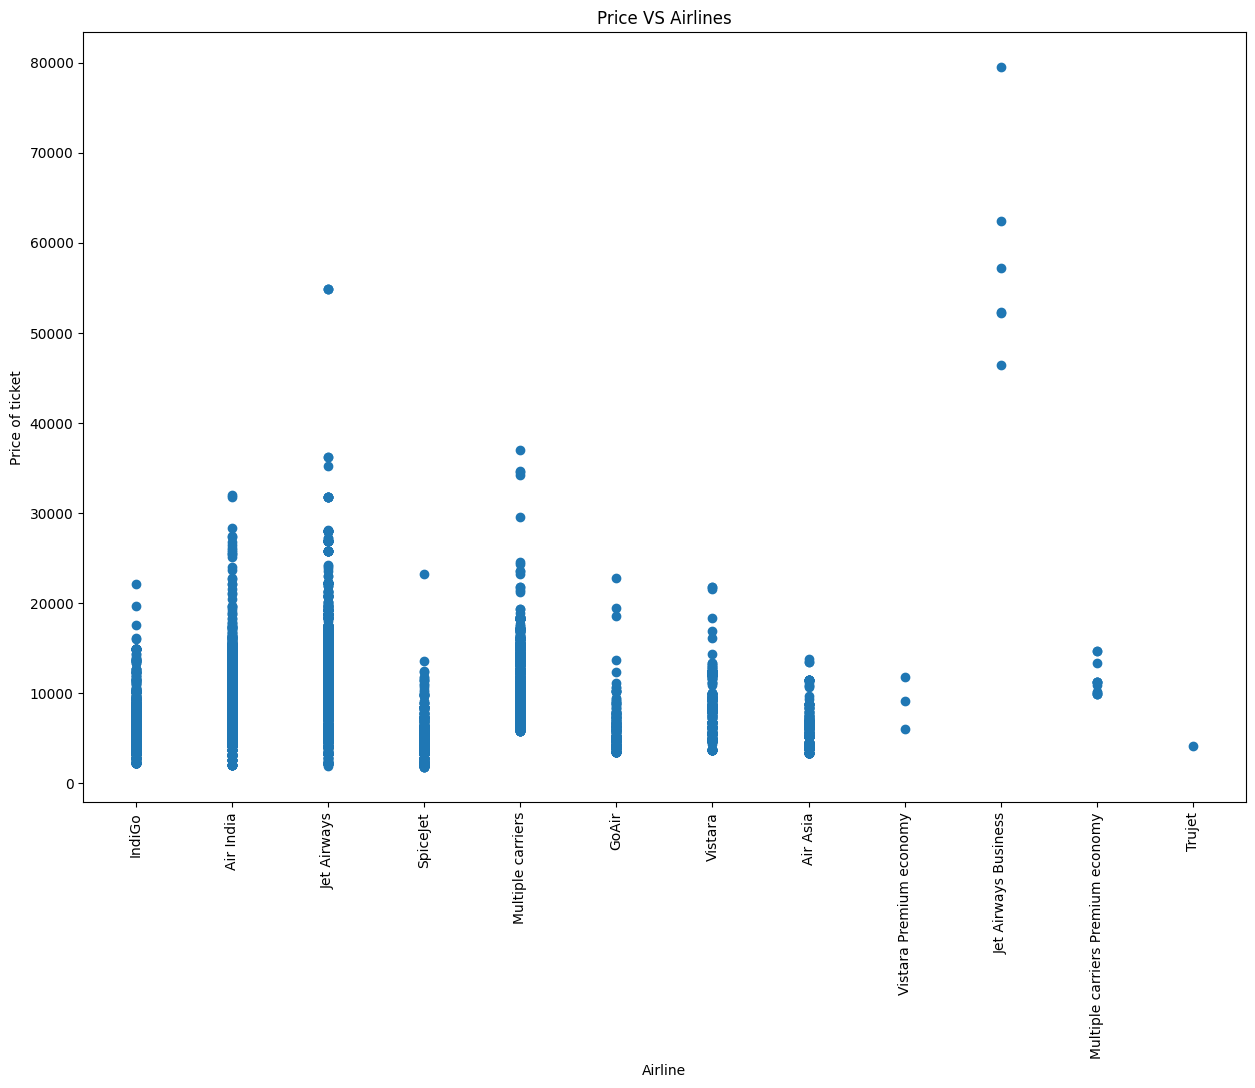

In [67]:
#Visualising price vs Airlines
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

## **Additional_Info**
We assessed the model’s performance with additional information and achieved an R² score of around 94.8%. However, for this particular use case, where actual values are unknown, the additional data, while improving performance, is not practical. Therefore, we decided to exclude it and proceed with the model without this information.

In [68]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8182
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [69]:
df.drop('Additional_Info',axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


## **Arrival and Departure Time**

In [70]:
def convert_duration(duration):
    if(len(duration.split())==2):
      return int(duration.split()[0][:-1])*60+int(duration.split()[1][:-1])
    return int(duration.split()[0][:-1])*60

df['Duration']=df['Duration'].apply(convert_duration)

In [71]:
def time_to_minutes(time_str):
    h, m = map(int, time_str.split(':'))
    return h * 60 + m

# Convert Dep_Time to minutes
df['Dep_Time_Minutes'] = df['Dep_Time'].apply(time_to_minutes)
df['Dep_Time_Minutes']

,Dep_Time_Minutes
0,1340
1,350
2,565
3,1085
4,1010
...,...
10678,1195
10679,1245
10680,500
10681,690


In [72]:
def process_arrival_time(arrival_str):
    parts = arrival_str.split()
    time_str = parts[0]
    # Check if there is a date part
    is_red_eye = 1 if len(parts) > 1 else 0
    # Convert time to minutes
    time_minutes = time_to_minutes(time_str)
    return is_red_eye, time_minutes

# Apply function to Arrival_Time
df[['Red_Eye', 'Arrival_Time_Minutes']] = df['Arrival_Time'].apply(process_arrival_time).apply(pd.Series)

# Drop original time columns if needed
df.drop(columns=['Dep_Time', 'Arrival_Time'], inplace=True)
df.head()



,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,1340,1,70
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,350,0,795
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,565,1,265
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,1085,0,1410
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,1010,0,1295


## **Date of Journey**

In [73]:
# Convert 'Date_of_Journey' column to datetime format for easier manipulation and analysis
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

<ipython-input-73-0d85abc0645a>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [74]:
df['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int32)

 **Since the dataset covers only a single year, we will focus only on the month and day components for analysis**


In [75]:
# Extract the month from the 'Date_of_Journey' column and create a new column 'Date_of_Journey_Month'
df['Date_of_Journey_Month'] = df['Date_of_Journey'].dt.month

# Extract the day from the 'Date_of_Journey' column and create a new column 'Date_of_Journey_Day'
df['Date_of_Journey_Month'] = df['Date_of_Journey'].dt.month

# Drop the original 'Date_of_Journey' column as it is no longer needed
df['Date_of_Journey_Month'] = df['Date_of_Journey'].dt.month

df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes,Date_of_Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,1340,1,70,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,350,0,795,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,565,1,265,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,1085,0,1410,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,1010,0,1295,3


## **Total Stops**

In [76]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [77]:
# Map the 'Total_Stops' column to numerical values: 'non-stop' as 0, '1 stop' as 1, '2 stops' as 2, '3 stops' as 3, and '4 stops' as 4.
# This transformation converts the categorical stop counts into numerical values for easier processing.
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes,Date_of_Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,3897,1340,1,70,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,350,0,795,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,565,1,265,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,1085,0,1410,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1010,0,1295,3


## **Airline**

In [78]:
df.Airline.value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [79]:
# Consolidated less common airlines into a single category 'Other' for simplicity and to handle rare cases.
df["Airline"].replace({'Multiple carriers Premium economy':'Other',
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },
                                        inplace=True)


In [80]:
# Convert categorical 'Airline' column into one-hot encoded columns to prepare the dataset for modeling.
df = pd.get_dummies(df, columns=['Airline'])
df.head()

,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes,Date_of_Journey_Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,3897,1340,1,70,3,False,False,False,True,False,False,False,False,False
1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,350,0,795,5,False,True,False,False,False,False,False,False,False
2,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,565,1,265,6,False,False,False,False,True,False,False,False,False
3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,1085,0,1410,5,False,False,False,True,False,False,False,False,False
4,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1010,0,1295,3,False,False,False,True,False,False,False,False,False


## **Source and Destination**

In [81]:
# Convert categorical 'Source' and 'Destination' columns into one-hot encoded columns
df=pd.get_dummies(data=df,columns=['Source','Destination'],drop_first=True)
df.head()

,Date_of_Journey,Route,Duration,Total_Stops,Price,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes,Date_of_Journey_Month,Airline_Air Asia,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,170,0,3897,1340,1,70,3,False,...,False,False,False,False,False,False,False,False,False,True
1,2019-05-01,CCU → IXR → BBI → BLR,445,2,7662,350,0,795,5,False,...,False,False,False,True,False,False,False,False,False,False
2,2019-06-09,DEL → LKO → BOM → COK,1140,2,13882,565,1,265,6,False,...,False,False,True,False,False,True,False,False,False,False
3,2019-05-12,CCU → NAG → BLR,325,1,6218,1085,0,1410,5,False,...,False,False,False,True,False,False,False,False,False,False
4,2019-03-01,BLR → NAG → DEL,285,1,13302,1010,0,1295,3,False,...,False,False,False,False,False,False,False,False,False,True


## **Routes**

In [82]:
df.Route.value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [83]:
# Extract unique cities from the 'Route' column and create binary columns for each city.
# Each new column indicates whether a particular city is present in the 'Route' for each row.
cities = set()
for route in df['Route']:
    cities.update(route.split(' → '))

for city in cities:
    df[city] = df['Route'].apply(lambda x: 1 if city in x else 0)


In [84]:
#Drop the original 'Route' column
df.drop(['Route'],axis=1,inplace=True)
df.head()

,Date_of_Journey,Duration,Total_Stops,Price,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes,Date_of_Journey_Month,Airline_Air Asia,Airline_Air India,...,DED,LKO,MAA,ISK,IXZ,JDH,COK,IXB,BHO,IXR
0,2019-03-24,170,0,3897,1340,1,70,3,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2019-05-01,445,2,7662,350,0,795,5,False,True,...,0,0,0,0,0,0,0,0,0,1
2,2019-06-09,1140,2,13882,565,1,265,6,False,False,...,0,1,0,0,0,0,1,0,0,0
3,2019-05-12,325,1,6218,1085,0,1410,5,False,False,...,0,0,0,0,0,0,0,0,0,0
4,2019-03-01,285,1,13302,1010,0,1295,3,False,False,...,0,0,0,0,0,0,0,0,0,0


## **Preparing the dataset for train-test-split**

In [85]:
# Reorder columns in the DataFrame to move the 'Price' column to the end, ensuring it's the target variable.
df = df[[col for col in df.columns if col != 'Price'] + ['Price']]
df.head()

,Date_of_Journey,Duration,Total_Stops,Dep_Time_Minutes,Red_Eye,Arrival_Time_Minutes,Date_of_Journey_Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,LKO,MAA,ISK,IXZ,JDH,COK,IXB,BHO,IXR,Price
0,2019-03-24,170,0,1340,1,70,3,False,False,False,...,0,0,0,0,0,0,0,0,0,3897
1,2019-05-01,445,2,350,0,795,5,False,True,False,...,0,0,0,0,0,0,0,0,1,7662
2,2019-06-09,1140,2,565,1,265,6,False,False,False,...,1,0,0,0,0,1,0,0,0,13882
3,2019-05-12,325,1,1085,0,1410,5,False,False,False,...,0,0,0,0,0,0,0,0,0,6218
4,2019-03-01,285,1,1010,0,1295,3,False,False,False,...,0,0,0,0,0,0,0,0,0,13302


## **Handling Outliers**

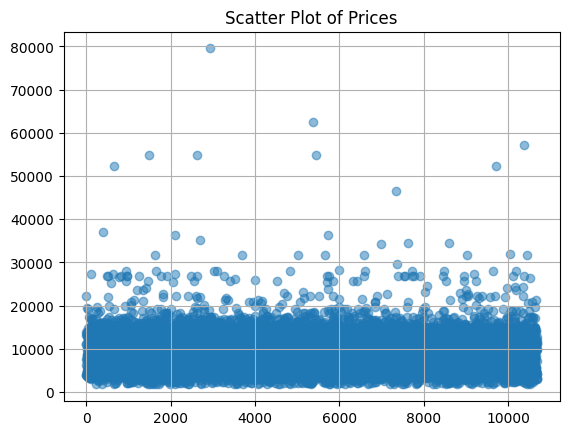

In [86]:
# Create a scatter plot of 'Price' to visualize its distribution and identify any potential outliers
plt.scatter(df.index, df['Price'], alpha=0.5)
plt.title('Scatter Plot of Prices')
plt.grid(True)
plt.show()

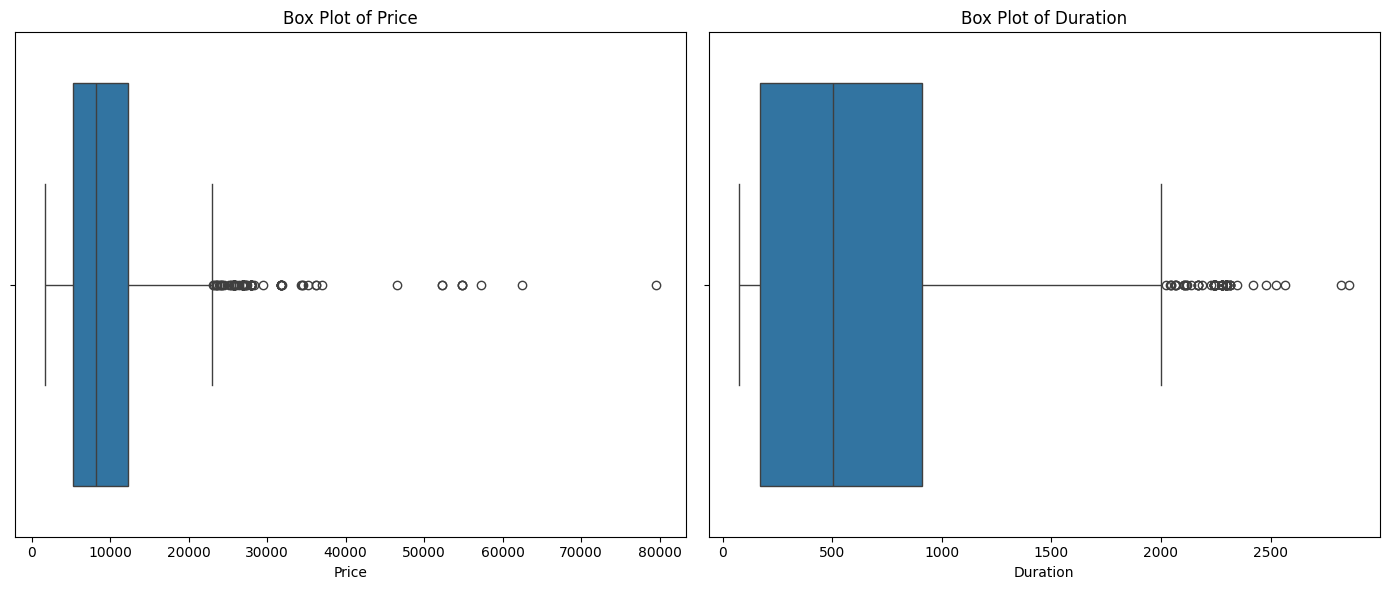

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plots to visualize outliers
plt.figure(figsize=(14, 6))

# Box plot for 'Price'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')

# Box plot for 'Duration'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Duration'])
plt.title('Box Plot of Duration')

plt.tight_layout()
plt.show()


In [88]:
def remove_outliers_iqr(df, column):
    # Calculate the first quartile (Q1) and third quartile (Q3) for the specified column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the rows where the column values are within the defined bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Apply the outlier removal function to the 'Price' column
df = remove_outliers_iqr(df, 'Price')

# Apply the outlier removal function to the 'Duration' column
df = remove_outliers_iqr(df, 'Duration')


In [89]:
# Convert all columns in the DataFrame to integer type for consistency and to prepare data for modeling
df = df.astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10294 entries, 0 to 10682
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Date_of_Journey            10294 non-null  int64
 1   Duration                   10294 non-null  int64
 2   Total_Stops                10294 non-null  int64
 3   Dep_Time_Minutes           10294 non-null  int64
 4   Red_Eye                    10294 non-null  int64
 5   Arrival_Time_Minutes       10294 non-null  int64
 6   Date_of_Journey_Month      10294 non-null  int64
 7   Airline_Air Asia           10294 non-null  int64
 8   Airline_Air India          10294 non-null  int64
 9   Airline_GoAir              10294 non-null  int64
 10  Airline_IndiGo             10294 non-null  int64
 11  Airline_Jet Airways        10294 non-null  int64
 12  Airline_Multiple carriers  10294 non-null  int64
 13  Airline_Other              10294 non-null  int64
 14  Airline_SpiceJet           

## **Normalisation**

In [91]:
# Initialize the StandardScaler for normalizing features by scaling them to have a mean of 0 and a standard deviation of 1
sc=StandardScaler()

## **Train Test Split**

In [92]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target variable

X = sc.fit_transform(X)  # Normalize the features using StandardScaler

# Split the data into training and testing sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Display the shapes of the training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8235, 67), (2059, 67), (8235,), (2059,))

In [93]:
!pip install catboost #for catboost regressor

## **Model fitting and evaluation**
This code evaluates multiple regression models on the test dataset. It includes training each model, making predictions, and computing performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), and a custom Accuracy metric. The results are stored in a dictionary and printed for comparison. This approach helps in assessing and comparing the performance of different regression algorithms.


In [94]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def accuracy(y_test, y_pred):
    errors = abs(y_test - y_pred)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    return accuracy

models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'k-Nearest Neighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(max_iter=100)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    acc = accuracy(y_test, y_pred)

    # Store the results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy': acc
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")



Model: XGBoost Regressor
MAE: 974.3315311707936
MSE: 2098387.439927267
RMSE: 1448.581181683397
R2 Score: 0.875740701283716
Accuracy: 88.93776661867417


Model: CatBoost Regressor
MAE: 1000.5441877488797
MSE: 2018924.1839484186
RMSE: 1420.8885191838306
R2 Score: 0.8804462424405894
Accuracy: 88.40648091322223


Model: k-Nearest Neighbors Regressor
MAE: 1258.8030111704713
MSE: 3669447.3084992715
RMSE: 1915.5801493279448
R2 Score: 0.7827079305972781
Accuracy: 85.81848461758018


Model: HistGradientBoosting Regressor
MAE: 1065.3730582167846
MSE: 2212823.081710644
RMSE: 1487.5560768289188
R2 Score: 0.8689642155282334
Accuracy: 87.58999126274993




***We observed that CatBoost achieved the highest R2 score among the models. Therefore, we will perform hyperparameter tuning using RandomizedSearchCV
for CatBoost to optimize its parameters and potentially enhance its performance further.***


In [95]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Define the CatBoost model
# catboost_model = CatBoostRegressor(verbose=0)

# # Define the hyperparameter grid
# param_distributions = {
#     'iterations': [100, 200, 500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'bagging_temperature': [0.0, 0.2, 0.5, 1.0],
#     'border_count': [32, 64, 128]
# }

# # Setup RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=catboost_model,
#     param_distributions=param_distributions,
#     n_iter=20,  # Number of parameter settings that are sampled
#     scoring='neg_mean_squared_error',
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1,  # Use all available cores
#     random_state=42
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters found: ", random_search.best_params_)

# # Predict on the test set using the best model
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Calculate metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Print evaluation metrics
# print("MAE: ", mae)
# print("MSE: ", mse)
# print("RMSE: ", rmse)
# print("R2 Score: ", r2)


**This code snippet initializes the CatBoostRegressor with the best hyperparameters, trains the model on your training data, makes predictions on the test set, and calculates performance metrics.**

In [96]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the best parameters
best_params = {
    'learning_rate': 0.1,
    'l2_leaf_reg': 3,
    'iterations': 1000,
    'depth': 6,
    'border_count': 64,
    'bagging_temperature': 0.0
}

# Initialize and train the CatBoost Regressor with the best parameters
catboost_model = CatBoostRegressor(**best_params, verbose=0)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("CatBoost Regressor Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


CatBoost Regressor Performance:
MAE: 951.4089342651371
MSE: 1926736.0899235515
RMSE: 1388.069194933578
R2 Score: 0.8859053048117966


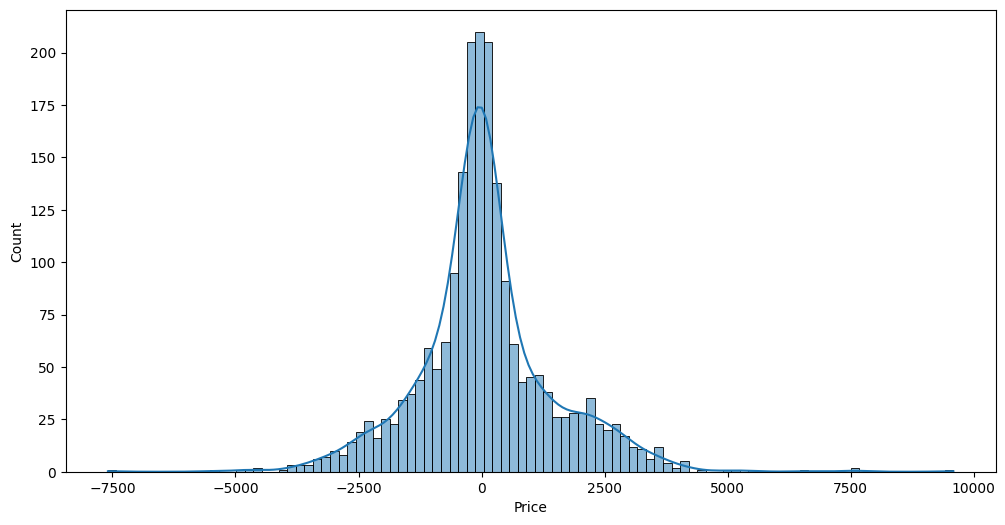

In [97]:
# Plot the distribution of residuals (errors) by visualizing the difference between actual values and predicted values
plt.figure(figsize=(12, 6))
sns.histplot(y_test - y_pred, kde=True)

# Display the plot
plt.show()


## **Testing on the model in the test dataset**

In [98]:
df=pd.read_excel('Data_Train.xlsx')
df=df.dropna()
df=df.drop_duplicates(keep='first')
df.drop('Additional_Info',axis=1,inplace=True)
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Date_of_Journey_Month'] = df['Date_of_Journey'].dt.month
df['Date_of_Journey_Month'] = df['Date_of_Journey'].dt.month
df['Date_of_Journey_Month'] = df['Date_of_Journey'].dt.month
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df["Airline"].replace({'Multiple carriers Premium economy':'Other',
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },
                                        inplace=True)
df = pd.get_dummies(df, columns=['Airline'])
df=pd.get_dummies(data=df,columns=['Source','Destination'],drop_first=True)
cities = set()
for route in df['Route']:
    cities.update(route.split(' → '))

for city in cities:
    df[city] = df['Route'].apply(lambda x: 1 if city in x else 0)
df.drop(['Route'],axis=1,inplace=True)
df['Duration']=df['Duration'].apply(convert_duration)
df['Dep_Time_Minutes'] = df['Dep_Time'].apply(time_to_minutes)
df[['Red_Eye', 'Arrival_Time_Minutes']] = df['Arrival_Time'].apply(process_arrival_time).apply(pd.Series)
df.drop(columns=['Dep_Time', 'Arrival_Time'], inplace=True)
df=df.astype(int)
X = sc.fit_transform(df)

<ipython-input-98-a8b2543a1a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Additional_Info',axis=1,inplace=True)
<ipython-input-98-a8b2543a1a89>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
<ipython-input-98-a8b2543a1a89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
<ipython-input-98-a8b2543a1a89>:6: Setting

In [99]:
predictions = catboost_model.predict(X)

In [100]:
predictions[:20]

array([ 6134.14217495, 13737.00779558, 12303.53752409,  8310.19263599,
       13868.40272994,  5407.32874944, 13532.05124496, 16655.56163759,
       13166.75208714,  8003.13108285,  9433.46957607,  5016.2236976 ,
        3413.98295095,  8750.32682197,  4885.92935082, 16994.01194744,
        8663.08635666,  8372.58342833, 12175.45198667,  9035.86222015])